<a href="https://colab.research.google.com/github/davidrtorres/Deep_Learning/blob/main/image_processing_scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Image Processing Using Scikit Image
2 main libraries for image processing are:<br>
scikit image<br>
OpenCV

Tasks to consider: Which libraries have the right tools to perform tasks?<br>
Gaussian smoothin
median filtering

Before we learned how to read image using scikit image and OpenCV.
<br>
Use rescaling.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import io, color #scikit image library
from skimage.transform import rescale, resize, downscale_local_mean #functions in transform for image transformation

In [3]:
#it's a numpy array and all values are between 0 and 1
img = io.imread("/content/drive/MyDrive/datasets/PlantVillage_full/Tomato__Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG", as_gray=True)
print(img)
print(img.dtype)
print(img.shape)
print(type(img))

[[0.55173412 0.52428314 0.56742039 ... 0.58702824 0.63408706 0.63800863]
 [0.53212627 0.61840078 0.59487137 ... 0.71644    0.66938118 0.59879294]
 [0.53996941 0.63800863 0.50075373 ... 0.66938118 0.55565569 0.54781255]
 ...
 [0.5189549  0.34248431 0.38562157 ... 0.52624745 0.50271804 0.43997294]
 [0.52679804 0.41699412 0.51503333 ... 0.63605137 0.51448275 0.56546314]
 [0.55032745 0.33464118 0.5071902  ... 0.57330627 0.48703176 0.56154157]]
float64
(256, 256)
<class 'numpy.ndarray'>


In [4]:
#scaling, provding a scaling factor of 0.25
#rescaling is ususally a better option if you want to resize your images 
img_rescaled = rescale(img, 0.25, anti_aliasing=False)
print(img_rescaled)
print(img_rescaled.dtype)
print(img_rescaled.shape)
print(type(img_rescaled))

[[0.58800863 0.52722431 0.53310667 ... 0.63800863 0.65173412 0.65271451]
 [0.51153804 0.48996941 0.49879294 ... 0.6036949  0.55859686 0.60271451]
 [0.50957725 0.3909498  0.46153804 ... 0.58800863 0.61644    0.61055765]
 ...
 [0.51797451 0.53758235 0.39836667 ... 0.56840431 0.53801216 0.52134549]
 [0.51209216 0.47483725 0.4944451  ... 0.51644353 0.50075725 0.58801216]
 [0.41503333 0.4562098  0.51111176 ... 0.50663961 0.56252196 0.5448749 ]]
float64
(64, 64)
<class 'numpy.ndarray'>


In [5]:
#resize output image
img_resized = resize(img, (400, 400), anti_aliasing=False)
print(img_resized)
print(img_resized.dtype)
print(img_resized.shape)
print(type(img_resized))

[[0.54694824 0.54499373 0.54433804 ... 0.63742824 0.63531529 0.63265804]
 [0.5471898  0.55415137 0.56882431 ... 0.64994588 0.63393176 0.62543294]
 [0.54865176 0.57313804 0.61687137 ... 0.66338118 0.62327922 0.60527137]
 ...
 [0.50504902 0.47243725 0.41879804 ... 0.52448275 0.53469451 0.54578471]
 [0.50944745 0.46269294 0.38635098 ... 0.5099102  0.5340498  0.55188196]
 [0.51069922 0.45564353 0.36537843 ... 0.50123569 0.52992118 0.54959804]]
float64
(400, 400)
<class 'numpy.ndarray'>


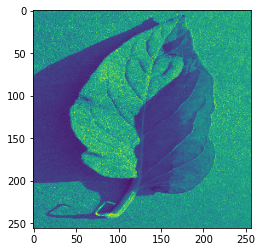

In [6]:
plt.imshow(img)

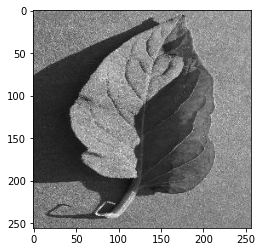

In [7]:
plt.imshow(img, cmap='gray')

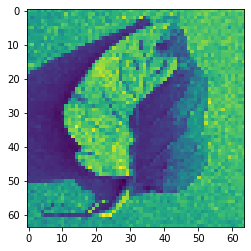

In [8]:
plt.imshow(img_rescaled)

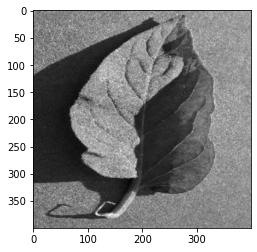

In [9]:
plt.imshow(img_resized, cmap='gray');

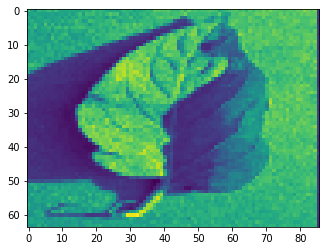

In [10]:
#downscale
#using local means of elements by defining a block
#it's strechting it to be a 4 x 3 format

img_downscaled = downscale_local_mean(img, (4,3))
plt.imshow(img_downscaled);

### 30. Basic Image Processing Using OpenCV

In [11]:
import cv2

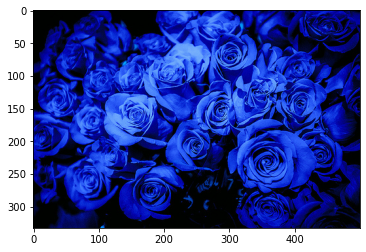

In [12]:
#read image
#1 means color
#color BGR and not RGB
img1 = cv2.imread("/content/drive/MyDrive/datasets/flower_photos/roses/10503217854_e66a804309.jpg", 1)
plt.imshow(img1)

In [13]:
from google.colab.patches import cv2_imshow

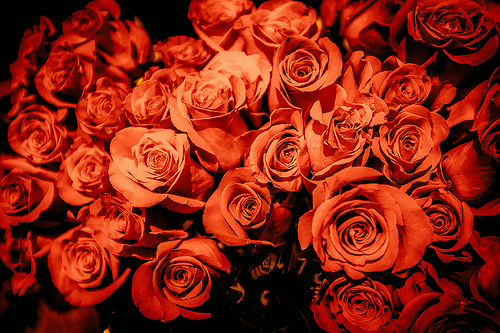

None
(333, 500, 3)


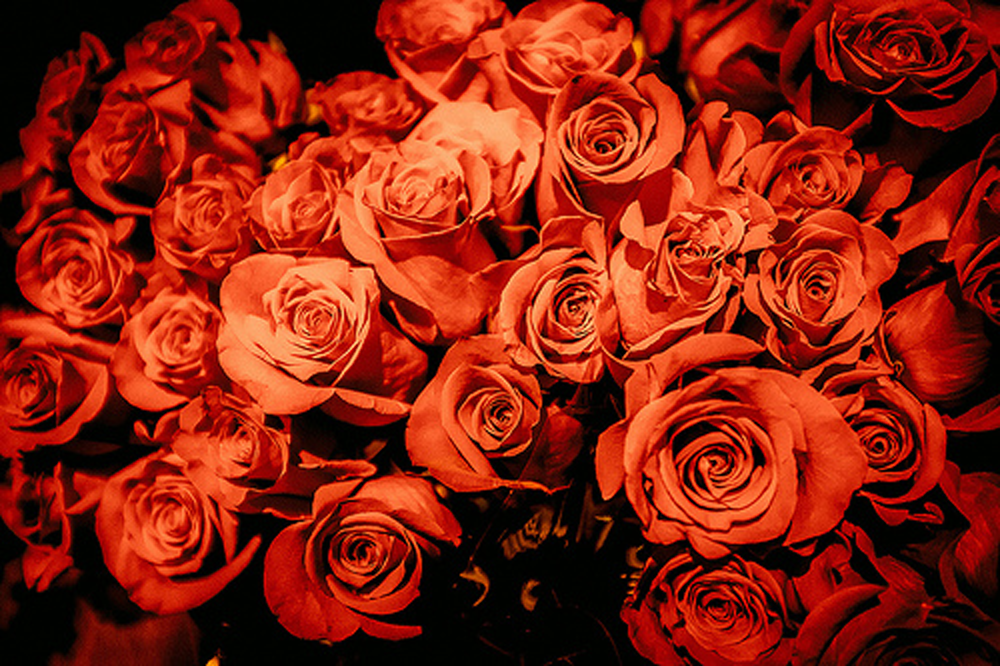

None
(666, 1000, 3)

Top Left [0 3 1]
Top Right [ 8  1 58]
Bottom Left [ 3  7 42]
Bottom Right [11 10 76]


In [14]:
#resize images. resizing img1 which is a numpy array
#output is going to be 2 times bigger
#interpolation - When stretching image how do you want to fill extra pixels that we're adding

resized1 = cv2.resize(img1, None, fx=2, fy=2, interpolation= cv2.INTER_CUBIC) #fx, fy by what factor do you want to resize it 
#cv2_imshow("orig pic", resized1)
print(cv2_imshow(img1))
print(img1.shape)
print(cv2_imshow(resized1))
print(resized1.shape)
print()
print("Top Left",img1[0,0]) #print values of pixels in the top left.  Value of 0 blue, 3 in green, 1 in red
print("Top Right",img1[0,400]) #print values of pixels in the top right, 8 blue, 1 green, 58 red
print("Bottom Left",img1[300,0]) #print values of pixels in the Bottom left, 3 blue, 7 green, 42 red
print("Bottom Right",img1[300,400]) #print values of pixels in the Bottom Right, 11 blue, 10 green, 76 red

### Split the Image
Why split?  Sometimes I just want to work with blue channel or red channel, etc.

In [15]:
"""
this splitting image is with using numpy array
calling blue image as original image
3 images of 335 by 500 w/blue, green, red
splitting them into blue green red
when you split channels it becomes a gray image
"""
grey_image = cv2.imread("/content/drive/MyDrive/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg",0)
img2 = cv2.imread("/content/drive/MyDrive/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg",1)
print(img2.shape)

blue= img2[:,:,0] #values from y,x.  Only from the 1st channel which is blue
green= img2[:,:,1]#2nd channel is green
red= img2[:,:,2] #3rd channel is red
print(blue.shape)
print(green.shape)
print(red.shape)

(335, 500, 3)
(335, 500)
(335, 500)
(335, 500)


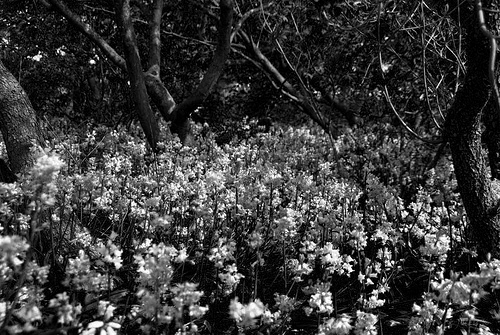

None


In [16]:
print(cv2_imshow(blue))

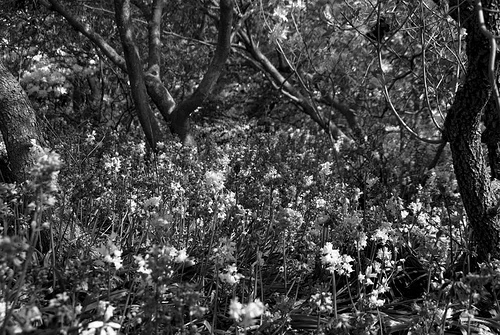

In [17]:
cv2_imshow(red)

Split image with split() function

In [18]:
#output will be blue, green and red
b,g,r = cv2.split(img2)

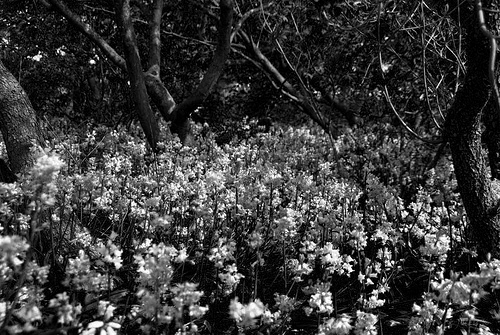

In [19]:
cv2_imshow(b)

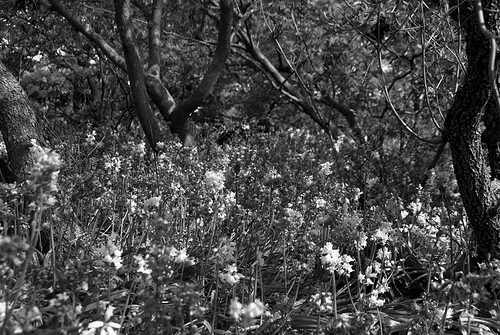

In [20]:
cv2_imshow(g)

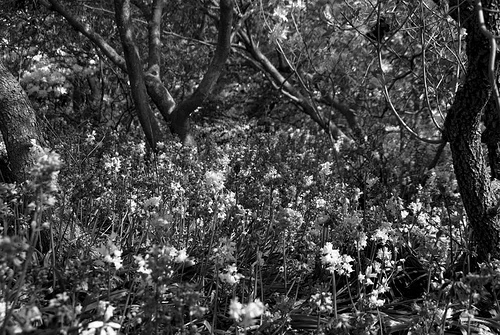

In [21]:
cv2_imshow(r)

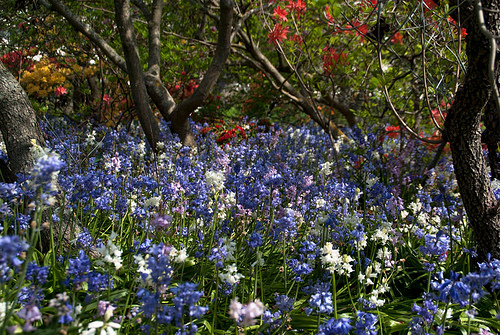

In [22]:
img_merged = cv2.merge((b,g,r))
cv2_imshow(img_merged)